# Practical Assignment II: Multilayer Perceptrons

In this DataLab, you will revisit one of the MLP models you developed in the previous DataLab and dive deeper into the process of evaluating and improving an MLP model. 

**Learning objectives:**

At the end of this DataLab, you will be able to build MLPs using Keras for the following problem types:

- Plot and interpret learning curves
- Use early stopping in Keras
- Tune the learning rate
 
**Notebook contents:**
 
 1. Learning Curves
 2. Early Stopping in Keras
 3. Tuning Learning Rate

**Packages:**

Let's start by importing the basic packages required for this DataLab:

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

**The dataset**

Today we will use the MNIST dataset provided by `keras`. This is the same dataset that you used in the previous DataLab for multi-class classification. If more information about the dataset is needed at any point, you can check the dataset documentation: https://keras.io/api/datasets/mnist/

Let's start by loading the dataset (notice that function ``mnist.load_data`` automatizally splits the data into a training set and a testing set):

In [106]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

To visualize how the samples look like, we can display a random sample from the dataset:

3


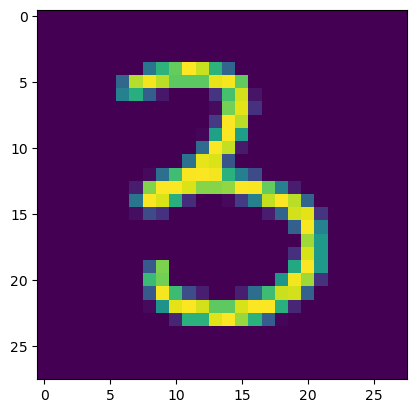

In [107]:
# random image
index = np.random.randint(0, 60000)
plt.imshow(X_train[index])
print(y_train[index])

We can also visualize the dimensions of the sets:

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## 1. Learning Curves

Learning curves are used to visually represent the learning process of a neural network over time. They plot the performance of the model on the training and validation datasets over the course of training iterations. Typically, the horizontal axis represents the number of epochs or iterations, and the vertical axis shows the loss or accuracy. By examining these curves, you can gain diagnose problems in the learning process, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative.

**Task 1.1** Adjust the shapes of X_train, X_test, y_train, y_test to be compatible with the network below.

<img src="https://edirlei.com/images/nn2.png" width="500">

In [109]:
# Reshape the input data to a 2D array of 28x28 pixels (784 pixels)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Reshape the output data to a 2D array of 10 pixels
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

**Task 1.2** Build the model. But this time, create a function for this task because you will have to repeat it a few times today.

In [110]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(print_summary=False):
    model = Sequential()
    
    # Add 3 dense layers of 128, 64 and 32 neurons each
    model.add(Dense(128, input_shape=(784,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
  
    # Add a dense layer with as many neurons as competitors
    model.add(Dense(10, activation='softmax'))
    
    # display summary is optional
    if print_summary:
        model.summary()
    return model

model = build_model(print_summary=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


**Task 1.3** Compile the model. Similarly to the previous task, create a function for the compilation process. 

In this DataLab we will use the Adam optimizer. During compilation, we can define an optimizer as `model.compile(optimizer='adam', ...)`

This is a good starting point, but it does not let us configure the optimizer. When we want to change the learning rate, we need to instantiate a new Adam optimizer and provide it to the compile function:

`from keras.optimizers import Adam`

`opt = Adam(learning_rate=0.001)`

`model.compile(optimizer=opt, ...)`

In this case, the parameter `learning_rate` of the `Adam` constructor defines the learning rate of the optimizer.

Note: If importing `Adam` gives an error, you are probably using a different version of Tensorflow. In this case, try importing `Adam` in the following way:

`from tensorflow.keras.optimizers import Adam`

In [111]:
from keras.optimizers import Adam

def compile_model(model, lr):
    opt = Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    return model

model = compile_model(model, lr=0.001)

**Task 1.4** Train the model for 5 epochs. This time save the history `H = model.fit(...)`.

In [112]:
H = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
 197/1875 [==>...........................] - ETA: 2s - loss: 4.4182 - accuracy: 0.3133

1875/1875 [==============================] - 3s 1ms/step - loss: 1.4153 - accuracy: 0.6065 - val_loss: 0.6303 - val_accuracy: 0.8138
Epoch 2/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.4741 - accuracy: 0.8711 - val_loss: 0.3137 - val_accuracy: 0.9298
Epoch 3/5
1875/1875 [==============================] - 1s 750us/step - loss: 0.2387 - accuracy: 0.9415 - val_loss: 0.1864 - val_accuracy: 0.9514
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1674 - accuracy: 0.9561 - val_loss: 0.1564 - val_accuracy: 0.9601
Epoch 5/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.1315 - accuracy: 0.9635 - val_loss: 0.1437 - val_accuracy: 0.9616


**Task 1.5** Evaluate the model using `model.evaluate()`.

In [113]:
val_loss, val_acc = model.evaluate(
    X_test, y_test
)

print(val_loss, val_acc)

  1/313 [..............................] - ETA: 4s - loss: 0.0895 - accuracy: 0.9688

313/313 [==============================] - 0s 435us/step - loss: 0.1437 - accuracy: 0.9616
0.14374035596847534 0.9616000056266785


**Task 1.6** Plot the learning curves for `loss` and `val_loss`. Write the code for plotting the curve in a function called `loss_plotter`. Example output:

<img src="https://edirlei.com/images/l_curve1.png" width="500">

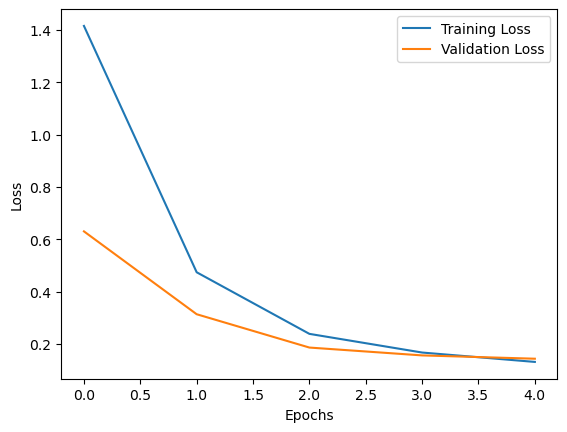

In [114]:
def loss_plotter(H):
    # Extracting loss and validation loss from H
    loss = H.history['loss']
    val_loss = H.history['val_loss']
    
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
loss_plotter(H)

**Task 1.7** Plot the learning curves for `accuracy` and `val_accuracy`. Write the code for plotting the curve in a function called `accuracy_plotter`. Example output:

<img src="https://edirlei.com/images/l_curve2.png" width="500">

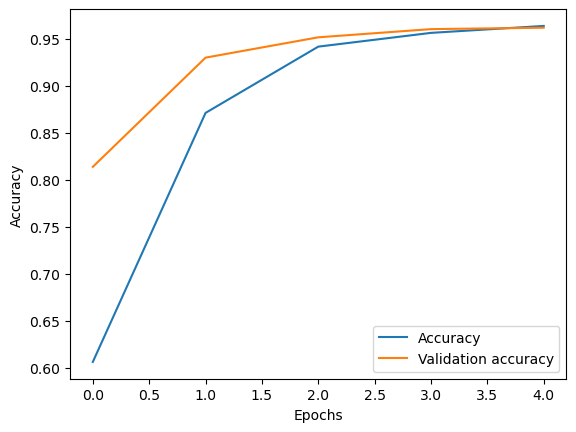

In [115]:
def accuracy_plotter(H):
    # Extracting accuracy and validation accuracy from H
    acc = H.history['accuracy']
    val_acc = H.history['val_accuracy']
    
    plt.plot(acc, label='Accuracy')
    plt.plot(val_acc, label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(H)

## 2. Early Stopping in Keras

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a regularization technique used in deep learning for preventing overfitting. This technique involves monitoring the model's performance on a validation dataset. During the training process, if the model's performance on the validation set begins to worsen or fails to improve for a predetermined number of epochs, the training process is halted. The idea is to stop training at the point where the model is generalized enough to perform well on both the training and validation datasets. Early stopping allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving.

Let's start by creating a new model using the functions create in the previous tasks:

In [116]:
model = build_model()
model = compile_model(model, lr=0.001)

**Task 2.1** Now, instead of setting a fixed number of epochs, use `EarlyStopping` callback. You can check the arguments for EarlyStopping callback in Keras documentation: https://keras.io/api/callbacks/early_stopping/
- Monitor the validation loss with a patience of 2. The patience is an argument of the `EarlyStopping` callback that defines the number of epochs with no improvement after which training will be stopped.
- Remember to restore the best weights. This is also defined by an argument of the `EarlyStopping` callback. Check Keras documentation to know how to use it.
- Notice that when using early stopping, you still need to set the number of epochs for training. Let's say you set the epochs to 10, and the model ran for 10 epochs. This means the stopping conditions you set in the callback did not occur therefore the training ran until the end. If the training runs for less than 10 epochs, this means early stopping kicked in.

In [117]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

**Task 2.2** Train the model with the callback you created in Task 2.1. From now on, always store the history `H = model.fit()`. Set the number of epochs such that you can observe the early stopping.

In [118]:
H = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.1, callbacks=[callback])

Epoch 1/30


1688/1688 [==============================] - 2s 803us/step - loss: 1.0535 - accuracy: 0.7900 - val_loss: 0.2957 - val_accuracy: 0.9228
Epoch 2/30
1688/1688 [==============================] - 1s 777us/step - loss: 0.3092 - accuracy: 0.9173 - val_loss: 0.2029 - val_accuracy: 0.9458
Epoch 3/30
1688/1688 [==============================] - 1s 767us/step - loss: 0.2093 - accuracy: 0.9407 - val_loss: 0.1344 - val_accuracy: 0.9617
Epoch 4/30
1688/1688 [==============================] - 1s 775us/step - loss: 0.1601 - accuracy: 0.9556 - val_loss: 0.1337 - val_accuracy: 0.9652
Epoch 5/30
1688/1688 [==============================] - 1s 764us/step - loss: 0.1323 - accuracy: 0.9620 - val_loss: 0.1176 - val_accuracy: 0.9695
Epoch 6/30
1688/1688 [==============================] - 1s 785us/step - loss: 0.1109 - accuracy: 0.9688 - val_loss: 0.1072 - val_accuracy: 0.9703
Epoch 7/30
1688/1688 [==============================] - 1s 763us/step - loss: 0.1007 - accuracy: 0.9721 - val_loss: 0.1149 - val_accura

**Task 2.3** Plot the learning curves and interpret your results.

- Compare these to the learning curves from Task 1
- Did the model train for more than 5 epochs?
- Did the performance improve?
- Do you think the model is overfitting?

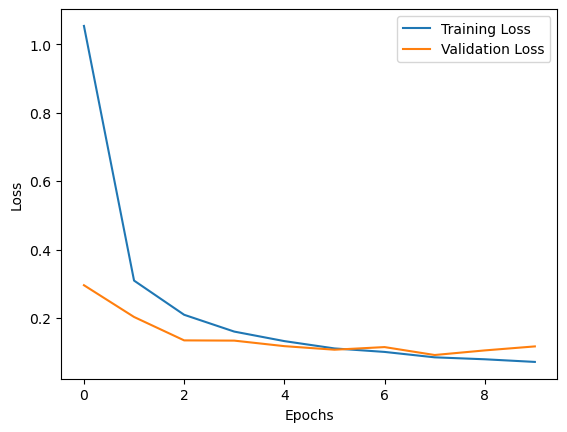

In [119]:
loss_plotter(H)

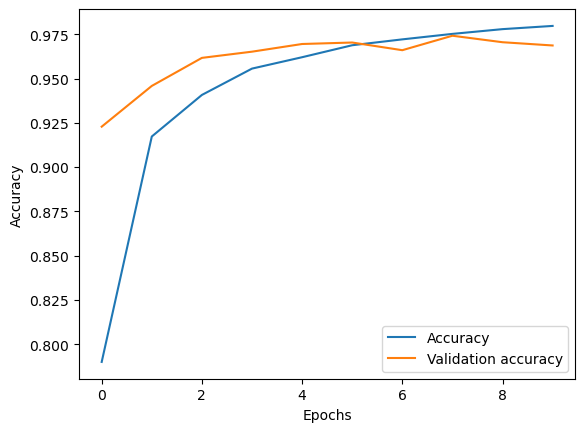

In [120]:
accuracy_plotter(H)

- Compared to the results from Task 1, the performance seems to have improved overall, as can be observed from both accuracies increasing over the epochs, and because the training and validation loss have been steadily decreasing.
- The model did train for more than 5 epochs (it trained for 7 epochs).
- I don't believe the model is overfitting as there is no significant gap between the training and validation metrics (loss or accuracy).

## 3. Tuning Learning Rate

The learning rate in neural networks is a crucial hyperparameter that determines the size of the steps taken during the optimization process. It controls how much the weights of the network are adjusted with respect to the gradient of the loss function. A higher learning rate means the model makes larger updates to its weights and learns faster, but it can overshoot the optimal values, leading to unstable training or divergence. Conversely, a lower learning rate ensures more precise adjustments, but it can lead to slower convergence and may get stuck in local minima. Choosing the right learning rate is essential for efficient training; it's often a balancing act between speed of convergence and the risk of overshooting.

For the next tasks, you will use 5 different learning rates:

In [121]:
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

**Task 3.1** Train the model with the 5 learning rates. 
- Use the early stopping callback you created in the previous tasks. 
- When you are training the models, save each history object. 
- Set the number of epochs to a large enough number such that early stopping occurs in some of the learning rates.

In [122]:
histories = [] # for plotting val_loss vs epochs for each learning rate
best_val_losses = [] # for plotting best_val_loss vs learning rate

for lr in learning_rates:
    print('Training with: ', lr)
    model = build_model()
    model = compile_model(model, lr=lr)
    
    # Train the model with early stopping #
    callback = EarlyStopping(monitor='val_loss',
                             patience=2,
                             restore_best_weights=True)
    H = model.fit(X_train,
                  y_train,
                  batch_size=32,
                  epochs=30,
                  validation_split=0.1,
                  callbacks=[callback])
    
    best_loss = H.history['val_loss'][-3] # -(patience + 1)
    
    best_val_losses.append(best_loss)
    histories.append(H)

Training with:  0.01
Epoch 1/30


1688/1688 [==============================] - 1s 790us/step - loss: 1.2769 - accuracy: 0.7921 - val_loss: 0.4908 - val_accuracy: 0.8937
Epoch 2/30
1688/1688 [==============================] - 1s 747us/step - loss: 0.4308 - accuracy: 0.8928 - val_loss: 0.3040 - val_accuracy: 0.9250
Epoch 3/30
1688/1688 [==============================] - 2s 903us/step - loss: 0.7202 - accuracy: 0.7910 - val_loss: 0.9675 - val_accuracy: 0.6955
Epoch 4/30
1688/1688 [==============================] - 1s 761us/step - loss: 0.8491 - accuracy: 0.7349 - val_loss: 0.6378 - val_accuracy: 0.8007
Training with:  0.001
Epoch 1/30
1688/1688 [==============================] - 1s 772us/step - loss: 1.0726 - accuracy: 0.8444 - val_loss: 0.2649 - val_accuracy: 0.9267
Epoch 2/30
1688/1688 [==============================] - 1s 751us/step - loss: 0.2560 - accuracy: 0.9283 - val_loss: 0.2299 - val_accuracy: 0.9410
Epoch 3/30
1688/1688 [==============================] - 1s 753us/step - loss: 0.1951 - accuracy: 0.9450 - val_los



**Task 3.1** Plot `val_loss` vs epochs for each learning rate.

Example output:

<img src="https://edirlei.com/images/l_curve3.png" width="500">

closer look:

<img src="https://edirlei.com/images/l_curve4.png" width="500">


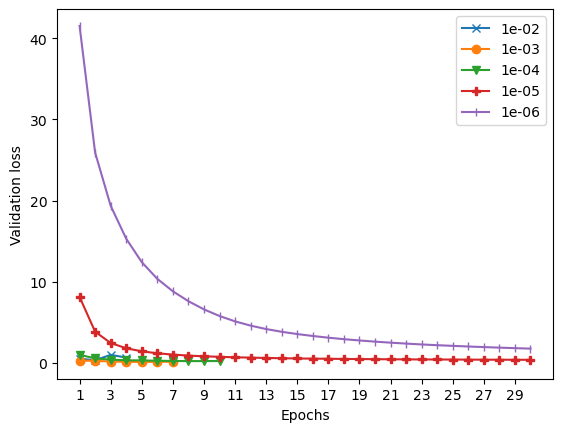

In [123]:
# Plot validation loss vs. epochs for each learning rate #
markers = ['x', 'o', 'v', 'P', '|']
max_epochs = 0
for i in range(len(histories)):
    num_epochs = len(histories[i].history['val_loss'])
    if num_epochs > max_epochs:
        max_epochs = num_epochs
    plt.plot(np.arange(1, num_epochs+1),
             histories[i].history['val_loss'],
             label="{:.0e}".format(learning_rates[i]),
             marker=markers[i])
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
_ = plt.xticks(np.arange(1, max_epochs+1, 2))

These plots show which learning rate(s) are a good choice. But we can plot the best loss vs learning rate to see the relationship even better. 

**Task 3.2** Plot best validation loss vs learning rate.

Example output:

<img src="https://edirlei.com/images/l_curve5.png" width="500">

Notice that we can use the validation loss obtained at the end of training (last epoch). But that is not necessarily the best. In fact, we are using early stopping for this reason: when the model is not improving, stop with a patience. If you configured the callback correctly, it returns the best model. 
- You can use `model.evaluate()` to calculate the best validation loss.
- Alternatively, since patience is 2, the 3<sup>rd</sup> validation loss from the last must be the best loss in the history.

Text(0, 0.5, 'Best validation loss')

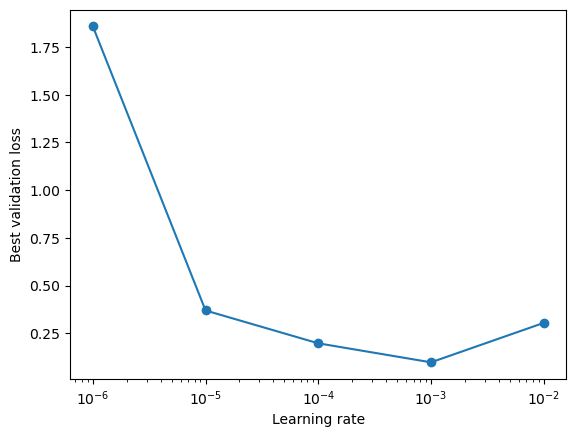

In [124]:
# Plot best validation loss vs learning rate # 
plt.plot(learning_rates, best_val_losses, marker='o')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('Best validation loss')